## Machine Learning Model

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("/Users/paloma/Downloads/final_df.csv")

/Users/paloma/.pyenv/versions/3.8.12/envs/ht_project/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,4,26,87,89,90,91,92,95,96,100,101,104,108,114,116) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.loc[0]

text                        My name is Vi. And I am 28 years old. I arrive...
name                                                                       Vi
year                                                                   2001.0
departure                                                             Vietnam
arrival                                                        American Samoa
                                                  ...                        
typeOfSexConcatenated                                                     NaN
recruiterRelationFriend                                                   NaN
recruiterRelationOther                                                    NaN
recruiterRelationUnknown                                                  NaN
alpha_3                                                                   ASM
Name: 0, Length: 121, dtype: object

In [4]:
data['gender'] = data['gender'].str.lower()

In [5]:
data['year'].isna().sum()

97779

In [6]:
data['gender'].value_counts()

female                       68795
male                         21905
unknown                        206
transgender/nonconforming       64
Name: gender, dtype: int64

In [7]:
data[['departure', 'arrival_1','theme_1']].isna().sum(axis = 0)

departure    44602
arrival_1    24353
theme_1      97754
dtype: int64

In [8]:
data['theme_1']

0           Forced labour
1        Domestic slavery
2        Domestic slavery
3        Domestic slavery
4             War slavery
               ...       
99103                 NaN
99104                 NaN
99105                 NaN
99106                 NaN
99107                 NaN
Name: theme_1, Length: 99108, dtype: object

In [9]:
data['departure'].value_counts()

Philippines             11499
Ukraine                 10005
Moldova, Republic of     7593
United States            6506
Mexico                   2412
                        ...  
Tunisia                     1
Poland                      1
Sweden                      1
Syria                       1
Germany                     1
Name: departure, Length: 110, dtype: int64

In [10]:
data['isSexualExploit'].isna().sum()

32349

In [11]:
data['isForcedLabour'].isna().sum()

32103

In [12]:
data[['gender', 'departure']].isna().sum(axis = 0)

gender        8138
departure    44602
dtype: int64

In [13]:
data[['gender', 'departure']].dropna()

,gender,departure
0,female,Vietnam
1,female,Sri Lanka
2,female,Sri Lanka
3,female,Mexico
4,male,Sudan
...,...,...
99103,male,Cameroon
99104,male,Cameroon
99105,male,Cameroon
99106,male,Cameroon


In [14]:
data['gender'].value_counts()

female                       68795
male                         21905
unknown                        206
transgender/nonconforming       64
Name: gender, dtype: int64

In [15]:
data['departure'].value_counts()

Philippines             11499
Ukraine                 10005
Moldova, Republic of     7593
United States            6506
Mexico                   2412
                        ...  
Tunisia                     1
Poland                      1
Sweden                      1
Syria                       1
Germany                     1
Name: departure, Length: 110, dtype: int64

In [16]:
import sklearn

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

In [18]:
data_model = data[['gender', 'departure', 'isForcedLabour', 'ageBroad']].copy()
data_model.dropna(inplace = True)

In [19]:
model = RandomForestClassifier()

# Define X and y
X = data_model[['gender','departure']].copy()
y = data_model[['isForcedLabour']].copy()

#model.fit(X, y)


In [20]:
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=999)
enc.fit(X)
X_proc = enc.transform(X)

In [21]:
model.fit(X_proc, y.values.flatten())

RandomForestClassifier()

In [22]:
y_pred = model.predict(X_proc)

In [23]:
y['pred'] = y_pred

In [24]:
y['correct'] = y['isForcedLabour'] == y['pred']

In [25]:
y['correct'].value_counts()

True     17434
False     1857
Name: correct, dtype: int64

In [26]:
y

,isForcedLabour,pred,correct
0,0.0,0.0,True
1,1.0,1.0,True
2,0.0,1.0,False
3,1.0,0.0,False
4,1.0,0.0,False
...,...,...,...
99103,1.0,1.0,True
99104,1.0,1.0,True
99105,1.0,1.0,True
99106,1.0,1.0,True


In [27]:
missing_data = data[data['isForcedLabour'].isna()].copy()

In [28]:
missing_data = missing_data[['gender', 'departure', 'isForcedLabour']].copy()

In [29]:
missing_data.dropna(subset=['gender', 'departure'], inplace=True)

In [30]:
X_missing = missing_data[['gender', 'departure']]
X_missing_proc = enc.transform(X_missing)

In [31]:
y_missing_pred = model.predict(X_missing_proc)

In [32]:
missing_data['pred'] = y_missing_pred

In [33]:
missing_data['pred'].value_counts()

0.0    18541
1.0     8264
Name: pred, dtype: int64

In [34]:
missing_data

,gender,departure,isForcedLabour,pred
1491,female,"Moldova, Republic of",NaN,0.0
1492,female,"Moldova, Republic of",NaN,0.0
1493,female,"Moldova, Republic of",NaN,0.0
1494,female,"Moldova, Republic of",NaN,0.0
1495,female,"Moldova, Republic of",NaN,0.0
...,...,...,...,...
98584,female,Cameroon,NaN,1.0
98585,female,Cameroon,NaN,1.0
98586,female,Cameroon,NaN,1.0
98587,female,Cameroon,NaN,1.0


In [35]:
data['ageBroad'].value_counts()

9--17           12507
30--38          10135
18--20           6040
21--23           5421
24--26           4583
39--47           4135
27--29           3555
48+              2300
0--8             2291
Unknown          1014
age_9_to_17       201
age_0_to_8        102
age_18_to_20       24
age_21_to_23        8
age_24_to_26        4
age_30-38           2
age_27_to_29        2
age_39_47           1
Name: ageBroad, dtype: int64

In [36]:
data['ageBroad'].dtype

dtype('O')

In [37]:
def ages(n):
    if n == 'age_9_to_17':
        return '9--17'
    if n == 'age_0_to_8':
        return '0--8 '
    if n == 'age_18_to_20':
        return '18--20'
    if n == 'age_21_to_23':
        return '21--23'
    if n == 'age_24_to_26':
        return '24--26'
    if n == 'age_30-38':
        return '30--38'
    if n == 'age_27_to_29':
        return '27--29'
    if n == 'age_39_47':
        return '39--47'
    if n == 'Unknown':
        return 'nan'
    else:
        return n
 

In [38]:
data['ageBroad'] = data['ageBroad'].map(ages)

In [39]:
data['ageBroad'].value_counts()

9--17     12708
30--38    10137
18--20     6064
21--23     5429
24--26     4587
39--47     4136
27--29     3557
48+        2300
0--8       2291
nan        1014
0--8        102
Name: ageBroad, dtype: int64

In [40]:
data['ageBroad'].isna().sum()

46783

In [41]:
data_model = data[['gender', 'departure', 'isForcedLabour', 'ageBroad']].copy()
data_model.dropna(inplace = True)

### First model: RandomForestClassifier. Predicting if it is forced labour

In [42]:
import sklearn 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split


In [184]:
data = pd.read_csv("/Users/paloma/Downloads/final_df.csv")

/Users/paloma/.pyenv/versions/3.8.12/envs/ht_project/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,4,26,87,89,90,91,92,95,96,100,101,104,108,114,116) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [185]:
def ages(n):
    if n == 'age_9_to_17':
        return '9--17'
    if n == 'age_0_to_8':
        return '0--8 '
    if n == 'age_18_to_20':
        return '18--20'
    if n == 'age_21_to_23':
        return '21--23'
    if n == 'age_24_to_26':
        return '24--26'
    if n == 'age_30-38':
        return '30--38'
    if n == 'age_27_to_29':
        return '27--29'
    if n == 'age_39_47':
        return '39--47'
    if n == 'Unknown':
        return 'nan'
    else:
        return n
 

In [186]:
data['ageBroad'] = data['ageBroad'].map(ages)

In [187]:
data_model = data[['gender', 'departure', 'isForcedLabour', 'ageBroad']].copy()
data_model.dropna(inplace = True)

In [188]:
model1 = RandomForestClassifier()

# Define X and y
X = data_model[['gender','departure', 'ageBroad']].copy()
y = data_model[['isForcedLabour']].copy()

#model.fit(X, y)


In [189]:
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=999)
enc.fit(X)
X_proc = enc.transform(X)

In [191]:
pipe1 = Pipeline([('transformation', enc),
               ('model', model1)])

In [192]:
pipe1

Pipeline(steps=[('transformation',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=999)),
                ('model', RandomForestClassifier())])

In [193]:
pipe1.fit(X,y)

/Users/paloma/.pyenv/versions/3.8.12/envs/ht_project/lib/python3.8/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('transformation',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=999)),
                ('model', RandomForestClassifier())])

In [194]:
joblib.dump(pipe1, filename = 'test_IsForcedLabour.joblib')

['test_IsForcedLabour.joblib']

In [49]:
X_example = [['female', 'Vietnam', '21--23']]

In [50]:
X_proc_example = enc.transform(X_example)

/Users/paloma/.pyenv/versions/3.8.12/envs/ht_project/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


In [51]:
classifier = model.fit(X_proc, y.values.flatten())
classifier

RandomForestClassifier()

In [52]:

classifier.predict_proba(X_proc_example)[0][0]

0.5415000000000001

In [70]:
import joblib

In [71]:
joblib.dump(classifier, filename = 'test_forcedlabour.joblib')

['test_forcedlabour.joblib']

In [60]:
model = joblib.load('test.joblib')

In [62]:
model.predict(X_proc)

array([0., 0., 0., ..., 1., 1., 1.])

In [56]:
# load saved model
model = joblib.load(path_to_file)

RandomForestClassifier()

In [ ]:
country = st.choice(list)
gender = 
age = 

In [ ]:
user_data = np.array([[]])

In [55]:
X

,gender,departure,ageBroad
0,female,Vietnam,nan
1,female,Sri Lanka,nan
2,female,Sri Lanka,9--17
3,female,Mexico,9--17
4,male,Sudan,9--17
...,...,...,...
99103,Male,Cameroon,9--17
99104,Male,Cameroon,9--17
99105,Male,Cameroon,9--17
99106,Male,Cameroon,9--17


In [50]:
y_pred = model.predict(X_proc)

In [51]:
y['pred'] = y_pred

In [52]:
y

,isForcedLabour,pred
0,0.0,0.0
1,1.0,0.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0
...,...,...
99103,1.0,1.0
99104,1.0,1.0
99105,1.0,1.0
99106,1.0,1.0


In [53]:
y['correct'] = y['isForcedLabour'] == y['pred']

In [54]:
y['correct'].value_counts()

True     18129
False     1162
Name: correct, dtype: int64

In [55]:
y['correct'].value_counts()

True     18129
False     1162
Name: correct, dtype: int64

/Users/paloma/.pyenv/versions/3.8.12/envs/ht_project/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


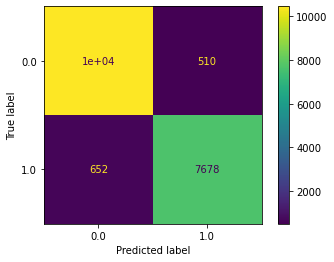

In [58]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_proc, y['isForcedLabour'])  
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_proc, y['isForcedLabour'], random_state = 1, 
                                                    test_size= 0.2)

In [60]:
model = RandomForestClassifier()

classifier = model.fit(X_train, y_train.values.flatten())

/Users/paloma/.pyenv/versions/3.8.12/envs/ht_project/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


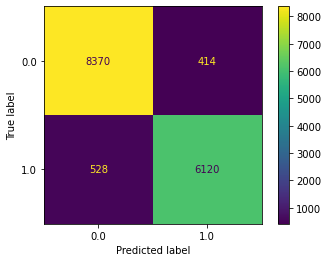

In [61]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_train, y_train)  
plt.show()

/Users/paloma/.pyenv/versions/3.8.12/envs/ht_project/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


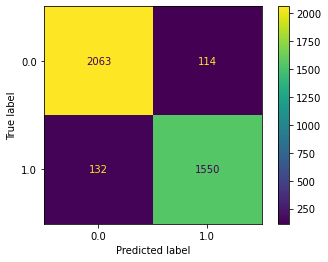

In [62]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y['correct'], y['pred'])

array([[  652,   510],
       [10451,  7678]])

In [64]:
missing_data = data[data['isForcedLabour'].isna()].copy()

In [65]:
missing_data = missing_data[['gender', 'departure', 'isForcedLabour', 'ageBroad']].copy()

In [66]:
missing_data.dropna(subset=['gender', 'departure','ageBroad'], inplace=True)

In [67]:
X_missing = missing_data[['gender', 'departure', 'ageBroad']]
X_missing_proc = enc.transform(X_missing)

In [68]:
y_missing_pred = model.predict(X_missing_proc)

In [64]:
missing_data['pred'] = y_missing_pred

In [65]:
missing_data['pred'].value_counts()

0.0    9907
1.0    7528
Name: pred, dtype: int64

In [66]:
missing_data

,gender,departure,isForcedLabour,ageBroad,pred
1491,Female,"Moldova, Republic of",NaN,18--20,0.0
1492,Female,"Moldova, Republic of",NaN,18--20,0.0
1493,Female,"Moldova, Republic of",NaN,18--20,0.0
1494,Female,"Moldova, Republic of",NaN,18--20,0.0
1495,Female,"Moldova, Republic of",NaN,18--20,0.0
...,...,...,...,...,...
98584,Female,Cameroon,NaN,30--38,1.0
98585,Female,Cameroon,NaN,30--38,1.0
98586,Female,Cameroon,NaN,30--38,1.0
98587,Female,Cameroon,NaN,30--38,1.0


### Second model: RandomForestClassifier. Predicting if it is forced labour

In [156]:
data_model = data[['gender', 'departure', 'ageBroad', 'isSexualExploit']].copy()
data_model.dropna(inplace = True)

In [157]:
model = RandomForestClassifier()

# Define X and y
X = data_model[['gender','departure', 'ageBroad']].copy()
y = data_model['isSexualExploit'].copy()

#model.fit(X, y)


#  classifier = model.fit(X_proc, y.values.flatten())

In [158]:
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=999)

In [159]:
#enc.fit(X)
#X_proc = enc.transform(X)

In [160]:
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder()#handle_unknown='use_encoded_value', unknown_value=999)

In [129]:
X_proc

array([[ 2., 95., 10.],
       [ 2., 77., 10.],
       [ 2., 77.,  9.],
       ...,
       [ 0., 13.,  6.],
       [ 0., 13.,  6.],
       [ 0., 13.,  6.]])

In [161]:
from sklearn.pipeline import Pipeline
#from sklearn.compose import ColumnTransformer
#column_transformer = ColumnTransformer(enc)

In [162]:
pipe = Pipeline([('transformation', enc),
               ('model', model)])

In [163]:
pipe

Pipeline(steps=[('transformation',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=999)),
                ('model', RandomForestClassifier())])

In [164]:
pipe.fit(X,y)

Pipeline(steps=[('transformation',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=999)),
                ('model', RandomForestClassifier())])

In [108]:
X_example = [['female', 'Vietnam', '21--23']]

In [109]:
X_proc_example = enc.transform(X_example)

/Users/paloma/.pyenv/versions/3.8.12/envs/ht_project/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


In [111]:
classifier.predict(X_proc_example)

array([1.])

In [165]:
joblib.dump(pipe, filename = 'test_IsSexualExploit.joblib')

['test_IsSexualExploit.joblib']

In [131]:
y_pred = model.predict(X_proc)

In [132]:
y['pred'] = y_pred

In [100]:
X.loc[98584]

gender         Female
departure    Cameroon
ageBroad       30--38
Name: 98584, dtype: object

In [134]:
y['correct'] = y['isSexualExploit'] == y['pred']

In [135]:
y['correct'].value_counts()

True     18923
False     2180
Name: correct, dtype: int64

In [136]:
y

,isSexualExploit,pred,correct
0,1.0,0.0,False
1,0.0,0.0,True
2,0.0,0.0,True
3,1.0,1.0,True
4,1.0,1.0,True
...,...,...,...
98584,1.0,1.0,True
98585,1.0,1.0,True
98586,1.0,1.0,True
98587,1.0,1.0,True


/Users/paloma/.pyenv/versions/3.8.12/envs/ht_project/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


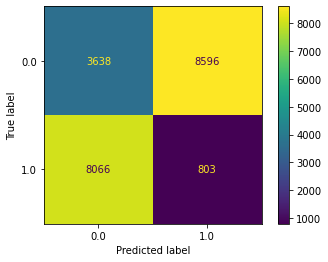

In [137]:
plot_confusion_matrix(classifier, X_proc, y['isSexualExploit'])  
plt.show()

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_proc, y['isSexualExploit'], random_state = 1, 
                                                    test_size= 0.2)

In [139]:
model = RandomForestClassifier()

classifier = model.fit(X_train, y_train.values.flatten())

/Users/paloma/.pyenv/versions/3.8.12/envs/ht_project/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


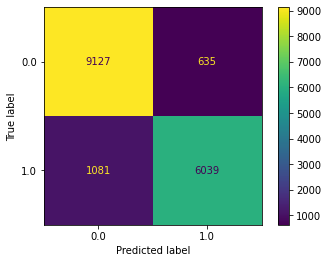

In [140]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_train, y_train)  
plt.show()

/Users/paloma/.pyenv/versions/3.8.12/envs/ht_project/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


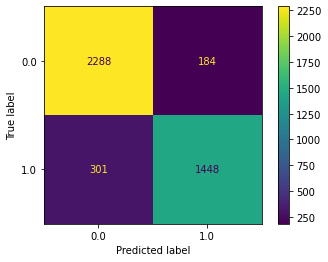

In [141]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [ ]:
missing_data = data[data['isSexualExploit'].isna()].copy()

In [ ]:
missing_data = missing_data[['gender', 'departure', 'isSexualExploit', 'ageBroad']].copy()

In [ ]:
missing_data.dropna(subset=['gender', 'departure','ageBroad'], inplace=True)

In [ ]:
X_missing = missing_data[['gender', 'departure', 'ageBroad']]
X_missing_proc = enc.transform(X_missing)

In [ ]:
y_missing_pred = model.predict(X_missing_proc)

In [ ]:
missing_data['pred'] = y_missing_pred

In [ ]:
missing_data['pred'].value_counts()

## Joblib test

In [166]:
model_sexualexploit = joblib.load('test_IsSexualExploit.joblib')

In [195]:
model_forcedlabour = joblib.load('test_IsForcedLabour.joblib')

In [198]:
my_X = [['female', 'Vietnam', '48+']]

In [199]:
model_forcedlabour.predict(my_X)

/Users/paloma/.pyenv/versions/3.8.12/envs/ht_project/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([0.])